In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from os import path
import seaborn as sns
from scipy.stats import kruskal, f_oneway

In [2]:
path.abspath('.')

'/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/notebooks/coupling_analysis'

In [3]:
distance_fetchers_path = path.abspath(
    path.join('..','..','diss3_code','distance'
    ))

path.exists(distance_fetchers_path), distance_fetchers_path

(True,
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/diss3_code/distance')

In [4]:
sys.path.append(distance_fetchers_path)
import distance_fetchers as dist

['/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/notebooks/coupling_analysis', '/home/siegman/miniconda3/lib/python37.zip', '/home/siegman/miniconda3/lib/python3.7', '/home/siegman/miniconda3/lib/python3.7/lib-dynload', '', '/home/siegman/miniconda3/lib/python3.7/site-packages', '/home/siegman/miniconda3/lib/python3.7/site-packages/IPython/extensions', '/home/siegman/.ipython', '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/diss3_code/distance', '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/diss3_code/signal', '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/diss3_code/database']


In [5]:
from importlib import reload
reload(dist)

<module 'distance_fetchers' from '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/diss3_code/distance/distance_fetchers.py'>

In [6]:
dir(dist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'all_ecg_distances_by_session',
 'distance',
 'get_all_sessions_all_groups',
 'path',
 'pd',
 'rearrange_header',
 'sf',
 'sys']

In [7]:
sessions = ['BL','I', 'BLE', 'FS']

In [8]:
all_sessions_all_groups = pd.concat([dist.all_ecg_distances_by_session(s).assign(session=s) for s in sessions])

In [15]:
asag1 = all_sessions_all_groups.reset_index(drop=True)
asag1['group_id']=asag1.level_0.map(lambda s: s.split('_')[0])
asag1['signal_type']=asag1.level_0.map(lambda s: s.split('_')[1])

groups = asag1.group_id.unique()
signal_types = asag1.signal_type.unique()

groups,signal_types

(array(['1004', '1006', '1007', '1008', '1009', '1010', '1011', '1012',
        '1013', '1014', '1016', '1019', '1020', '1022', '1024', '1025',
        '1026', '1027', '1028', '1029', '1030', '1031', '1032', '1033',
        '1034', '1035', '1036', '1037', '1038', '1039', '1040', '1041',
        '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049',
        '1050', '1051'], dtype=object),
 array(['hf', 'lf', 'raw', 'rms'], dtype=object))

In [25]:
asag1['sn']= asag1.groupby(['level_0','session']).cumcount()+1

In [26]:
asag1

,level_0,level_1,other,dist,session,group_id,signal_type,sn
0,1004_hf,110,111,0.529081,BL,1004,hf,1
1,1004_hf,110,112,0.476258,BL,1004,hf,2
2,1004_hf,111,112,0.491596,BL,1004,hf,3
3,1004_lf,110,111,0.496202,BL,1004,lf,1
4,1004_lf,110,112,0.390442,BL,1004,lf,2
...,...,...,...,...,...,...,...,...
1979,1051_raw,254,256,0.485756,FS,1051,raw,2
1980,1051_raw,255,256,0.418913,FS,1051,raw,3
1981,1051_rms,254,255,0.501272,FS,1051,rms,1
1982,1051_rms,254,256,0.459173,FS,1051,rms,2


In [27]:
asag1.sn.describe()

count    1984.000000
mean        1.991935
std         0.818308
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: sn, dtype: float64

In [36]:
# populate a new one without pivoting

pt = pd.DataFrame(data=np.nan, 
    index=pd.MultiIndex.from_product([groups,signal_types]),
    columns=pd.MultiIndex.from_product([sessions,[f'dist{i}' for i in range(1,4)]])
                 )
pt

BL                 I               BLE                FS        \
         dist1 dist2 dist3 dist1 dist2 dist3 dist1 dist2 dist3 dist1 dist2   
1004 hf    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     lf    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     raw   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     rms   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1006 hf    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1050 rms   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1051 hf    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     lf    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     raw   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     rms   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                
         dist3  
1004 hf    NaN  
     lf    NaN  
     raw   NaN  
     rms   NaN  
1006 hf    NaN  
...        ...  
1050 rms   NaN  
1051 hf    NaN  
     lf    NaN  
     raw   NaN  
     rms   NaN  

[168 rows x 12 columns]

In [38]:
for r in asag1.itertuples():
    pt.loc[(r.group_id, r.signal_type),(r.session,f'dist{r.sn}')]=r.dist
    
pt=pt.dropna()
pt

BL                             I                      \
             dist1     dist2     dist3     dist1     dist2     dist3   
1004 hf   0.529081  0.476258  0.491596  0.501818  0.497332  0.494446   
     lf   0.496202  0.390442  0.494384  0.472044  0.421288  0.383315   
     raw  0.512770  0.441745  0.488103  0.488049  0.451301  0.454624   
     rms  0.518531  0.449322  0.496086  0.502927  0.485849  0.478503   
1006 hf   0.498601  0.460726  0.507896  0.427924  0.474455  0.432463   
...            ...       ...       ...       ...       ...       ...   
1050 rms  0.498486  0.464592  0.501154  0.514286  0.474545  0.489681   
1051 hf   0.401788  0.478618  0.486739  0.502321  0.510908  0.478568   
     lf   0.533711  0.451396  0.447368  0.433779  0.455352  0.414440   
     raw  0.505510  0.461311  0.448511  0.446169  0.460829  0.426950   
     rms  0.461760  0.531017  0.531355  0.467447  0.457594  0.460576   

               BLE                            FS                      
             dist1     dist2     dist3     dist1     dist2     dist3  
1004 hf   0.512642  0.480706  0.493916  0.516311  0.474845  0.513394  
     lf   0.464573  0.454166  0.492326  0.449257  0.512371  0.469092  
     raw  0.490716  0.462332  0.493373  0.497786  0.502590  0.493691  
     rms  0.489181  0.491492  0.548881  0.479025  0.482680  0.523119  
1006 hf   0.473092  0.461306  0.509708  0.496867  0.490691  0.478770  
...            ...       ...       ...       ...       ...       ...  
1050 rms  0.555608  0.472632  0.508965  0.461105  0.486606  0.477681  
1051 hf   0.531839  0.479714  0.555701  0.526677  0.465247  0.513106  
     lf   0.549287  0.450777  0.506477  0.542650  0.505145  0.371835  
     raw  0.533489  0.473790  0.548413  0.557759  0.485756  0.418913  
     rms  0.515627  0.510870  0.466970  0.501272  0.459173  0.475538  

[164 rows x 12 columns]

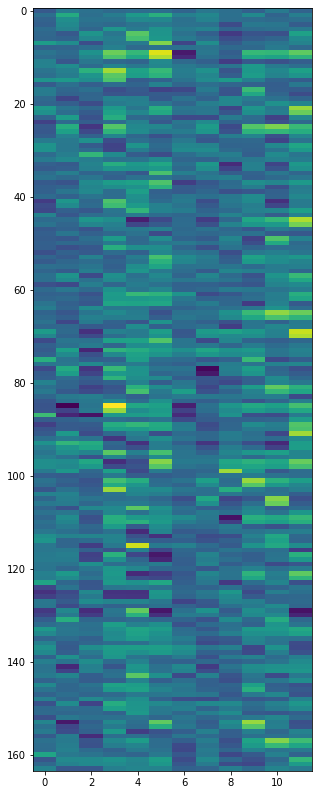

In [67]:
plt.figure(figsize=(5,15))
plt.imshow(-pt.values, aspect=0.2)

In [44]:
pt.iloc[68:80,:]

BL                             I                      \
             dist1     dist2     dist3     dist1     dist2     dist3   
1027 hf   0.507178  0.505667  0.528543  0.520645  0.443711  0.518943   
     lf   0.418433  0.502286  0.586354  0.465774  0.473769  0.415781   
     raw  0.456601  0.512425  0.550370  0.498001  0.473209  0.433849   
     rms  0.551510  0.484610  0.488892  0.409183  0.406738  0.344555   
1029 hf   0.518171  0.492219  0.475837  0.508899  0.444967  0.433862   
     lf   0.526449  0.412666  0.601369  0.375726  0.389401  0.412732   
     raw  0.514985  0.446681  0.544211  0.452143  0.408087  0.430577   
     rms  0.384750  0.485883  0.521155  0.515098  0.415423  0.496448   
1030 hf   0.484066  0.481047  0.451120  0.485192  0.473288  0.507241   
     lf   0.553760  0.392003  0.581666  0.366216  0.434441  0.486099   
     raw  0.525463  0.414621  0.559625  0.422492  0.432636  0.507641   
     rms  0.519188  0.498051  0.519167  0.376210  0.442848  0.448538   

               BLE                            FS                      
             dist1     dist2     dist3     dist1     dist2     dist3  
1027 hf   0.501334  0.491458  0.569846  0.484927  0.454891  0.469771  
     lf   0.530807  0.419501  0.407345  0.425986  0.463093  0.266885  
     raw  0.528630  0.436292  0.450610  0.440840  0.464531  0.280693  
     rms  0.484082  0.553444  0.456509  0.511228  0.520478  0.506643  
1029 hf   0.484150  0.479524  0.509343  0.471570  0.500786  0.479619  
     lf   0.439364  0.400370  0.433702  0.425407  0.484281  0.464015  
     raw  0.466685  0.426247  0.443476  0.440305  0.485957  0.468086  
     rms  0.499350  0.529057  0.514200  0.366500  0.552648  0.521942  
1030 hf   0.516870  0.484679  0.469236  0.486600  0.462237  0.456059  
     lf   0.488329  0.636855  0.466883  0.415642  0.509662  0.544613  
     raw  0.498835  0.617939  0.471283  0.429188  0.502919  0.522480  
     rms  0.520834  0.533764  0.539148  0.516541  0.446700  0.504575

In [42]:
from scipy.stats import ttest_rel

ttest_rel(pt[('BL','dist1')],pt[('BL','dist2')])

Ttest_relResult(statistic=0.9472911167029398, pvalue=0.34489270181603116)

In [43]:
ttest_rel(pt[('FS','dist3')],pt[('FS','dist2')])

Ttest_relResult(statistic=-2.4305943680353885, pvalue=0.016158670189062457)

In [45]:
ttest_rel(pt[('FS','dist1')],pt[('FS','dist2')])

Ttest_relResult(statistic=-0.2802496708181587, pvalue=0.7796413164702749)

In [46]:
ttest_rel(pt[('FS','dist1')],pt[('FS','dist3')])

Ttest_relResult(statistic=2.1857110086455, pvalue=0.030263255556754944)

/home/siegman/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/siegman/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel="('FS', 'dist3')", ylabel='Density'>

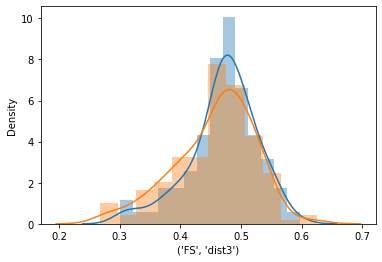

In [53]:
#sns.distplot(pt[('FS','dist1')])
sns.distplot(pt[('FS','dist2')])
sns.distplot(pt[('FS','dist3')])
#plt.legend()

<AxesSubplot:>

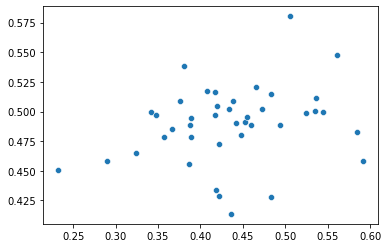

In [64]:
sns.scatterplot(
    x=pt.loc[pt.index.map(lambda t: t[1]=='lf'), ('I','dist1')].values,
    y=pt.loc[pt.index.map(lambda t: t[1]=='hf'), ('I','dist1')].values,
)

<AxesSubplot:>

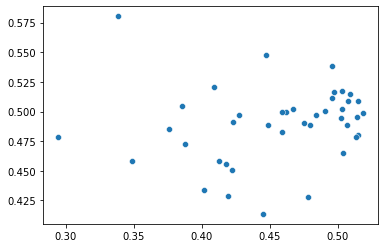

In [66]:
sns.scatterplot(
    x=pt.loc[pt.index.map(lambda t: t[1]=='rms'), ('I','dist1')].values,
    y=pt.loc[pt.index.map(lambda t: t[1]=='hf'), ('I','dist1')].values
)

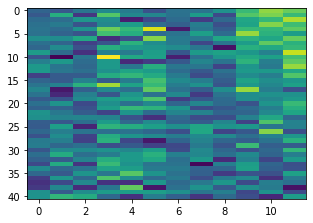

In [106]:
pt=pt.assign(fs_mean = pt.iloc[:,9:12].mean(axis=1))
plt.figure(figsize=(5,15))
plt.imshow(-pt.loc[pt.index.map(lambda s: s[1]=='lf'),:].sort_values('fs_mean').values[: ,:-1], aspect=0.2)

/home/siegman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


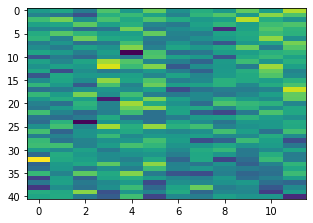

In [88]:
pt=pt.assign(fs_mean = pt.iloc[:,9:12].mean(axis=1))
plt.figure(figsize=(5,15))
plt.imshow(-pt.loc[pt.index.map(lambda s: s[1]=='hf'),:].sort_values('fs_mean').values[: ,:-1], aspect=0.2)

/home/siegman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


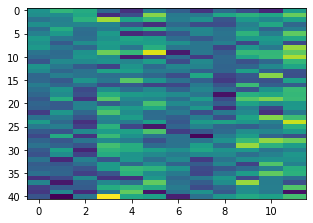

In [90]:
pt['fs_mean'] = pt.iloc[:,0:3].mean(axis=1)
plt.figure(figsize=(5,15))
plt.imshow(-pt.loc[pt.index.map(lambda s: s[1]=='lf'),:].sort_values('fs_mean').values[: ,:-1], aspect=0.2)

/home/siegman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


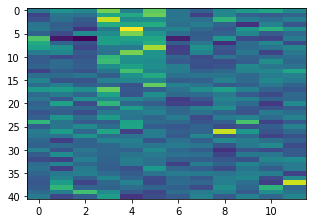

In [92]:
pt['fs_mean'] = pt.iloc[:,3:6].mean(axis=1)
plt.figure(figsize=(5,15))
plt.imshow(-pt.loc[pt.index.map(lambda s: s[1]=='rms'),:].sort_values('fs_mean').values[: ,:-1], aspect=0.2)

/home/siegman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


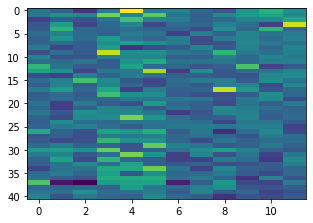

In [93]:
pt['fs_mean'] = pt.iloc[:,9:12].mean(axis=1)
plt.figure(figsize=(5,15))
plt.imshow(-pt.loc[pt.index.map(lambda s: s[1]=='rms'),:].sort_values('fs_mean').values[: ,:-1], aspect=0.2)

In [86]:
 pt.iloc[:,9:12].mean(axis=1)

1004  hf     0.501517
      lf     0.476906
      raw    0.498022
      rms    0.494942
1006  hf     0.488776
               ...   
1050  rms    0.475131
1051  hf     0.501677
      lf     0.473210
      raw    0.487476
      rms    0.478661
Length: 164, dtype: float64

In [104]:
pt.assign(fs_mean = pt.iloc[:,9:12].mean(axis=1))


BL                             I                      \
             dist1     dist2     dist3     dist1     dist2     dist3   
1004 hf   0.529081  0.476258  0.491596  0.501818  0.497332  0.494446   
     lf   0.496202  0.390442  0.494384  0.472044  0.421288  0.383315   
     raw  0.512770  0.441745  0.488103  0.488049  0.451301  0.454624   
     rms  0.518531  0.449322  0.496086  0.502927  0.485849  0.478503   
1006 hf   0.498601  0.460726  0.507896  0.427924  0.474455  0.432463   
...            ...       ...       ...       ...       ...       ...   
1050 rms  0.498486  0.464592  0.501154  0.514286  0.474545  0.489681   
1051 hf   0.401788  0.478618  0.486739  0.502321  0.510908  0.478568   
     lf   0.533711  0.451396  0.447368  0.433779  0.455352  0.414440   
     raw  0.505510  0.461311  0.448511  0.446169  0.460829  0.426950   
     rms  0.461760  0.531017  0.531355  0.467447  0.457594  0.460576   

               BLE                            FS                       fs_mean  
             dist1     dist2     dist3     dist1     dist2     dist3            
1004 hf   0.512642  0.480706  0.493916  0.516311  0.474845  0.513394  0.501517  
     lf   0.464573  0.454166  0.492326  0.449257  0.512371  0.469092  0.476906  
     raw  0.490716  0.462332  0.493373  0.497786  0.502590  0.493691  0.498022  
     rms  0.489181  0.491492  0.548881  0.479025  0.482680  0.523119  0.494942  
1006 hf   0.473092  0.461306  0.509708  0.496867  0.490691  0.478770  0.488776  
...            ...       ...       ...       ...       ...       ...       ...  
1050 rms  0.555608  0.472632  0.508965  0.461105  0.486606  0.477681  0.475131  
1051 hf   0.531839  0.479714  0.555701  0.526677  0.465247  0.513106  0.501677  
     lf   0.549287  0.450777  0.506477  0.542650  0.505145  0.371835  0.473210  
     raw  0.533489  0.473790  0.548413  0.557759  0.485756  0.418913  0.487476  
     rms  0.515627  0.510870  0.466970  0.501272  0.459173  0.475538  0.478661  

[164 rows x 13 columns]

In [110]:
pt.xs('rms', level=1).sort_values('fs_mean')

BL                             I                           BLE  \
         dist1     dist2     dist3     dist1     dist2     dist3     dist1   
1039  0.480670  0.508361  0.569187  0.479320  0.263078  0.476527  0.462792   
1034  0.484591  0.441286  0.459275  0.338520  0.465603  0.354760  0.486016   
1016  0.555082  0.517534  0.530803  0.483805  0.372604  0.461322  0.472155   
1033  0.526511  0.422893  0.549013  0.502120  0.463958  0.544694  0.498712   
1043  0.520872  0.386287  0.507176  0.508794  0.495119  0.507877  0.512594   
1050  0.498486  0.464592  0.501154  0.514286  0.474545  0.489681  0.555608   
1045  0.514349  0.437139  0.497050  0.427581  0.486823  0.505344  0.475355   
1044  0.507947  0.498592  0.516665  0.444945  0.418967  0.444358  0.471265   
1049  0.475968  0.546631  0.516375  0.422945  0.569629  0.538634  0.519749   
1036  0.534587  0.491072  0.518122  0.294553  0.448306  0.447195  0.483095   
1051  0.461760  0.531017  0.531355  0.467447  0.457594  0.460576  0.515627   
1022  0.493677  0.497319  0.484293  0.518248  0.442972  0.403207  0.488500   
1029  0.384750  0.485883  0.521155  0.515098  0.415423  0.496448  0.499350   
1006  0.417287  0.443751  0.547559  0.477986  0.475466  0.311010  0.558962   
1024  0.542670  0.552999  0.468439  0.507843  0.471163  0.490191  0.514515   
1012  0.499081  0.468113  0.371933  0.447393  0.523871  0.549186  0.495606   
1011  0.520753  0.463787  0.514540  0.458982  0.507255  0.541159  0.501233   
1035  0.475797  0.426209  0.504882  0.412566  0.553643  0.473607  0.514056   
1030  0.519188  0.498051  0.519167  0.376210  0.442848  0.448538  0.520834   
1047  0.512894  0.496492  0.509646  0.502881  0.478749  0.483037  0.474750   
1026  0.488742  0.556523  0.474213  0.515053  0.536119  0.432489  0.502824   
1009  0.503413  0.557941  0.508621  0.461751  0.468954  0.527775  0.489000   
1042  0.481370  0.526184  0.443620  0.459188  0.458846  0.481391  0.560136   
1037  0.508846  0.541317  0.452222  0.448940  0.335756  0.437747  0.493307   
1004  0.518531  0.449322  0.496086  0.502927  0.485849  0.478503  0.489181   
1031  0.506459  0.478549  0.468241  0.495897  0.517747  0.488284  0.473921   
1041  0.403866  0.507612  0.533975  0.419500  0.434276  0.398955  0.517586   
1019  0.528016  0.515270  0.537417  0.474913  0.478678  0.465616  0.504362   
1020  0.519298  0.543771  0.531768  0.385587  0.439139  0.441811  0.506314   
1013  0.496944  0.468210  0.512260  0.506694  0.530853  0.350375  0.466557   
1008  0.431093  0.422154  0.443812  0.348525  0.525009  0.515715  0.487430   
1046  0.474816  0.458200  0.522049  0.490383  0.337184  0.436995  0.552924   
1010  0.511408  0.417268  0.540445  0.387763  0.503646  0.514977  0.554037   
1014  0.516829  0.485245  0.452038  0.497598  0.413782  0.517271  0.526856   
1027  0.551510  0.484610  0.488892  0.409183  0.406738  0.344555  0.484082   
1038  0.498974  0.477062  0.506147  0.417762  0.527877  0.444140  0.500306   
1025  0.485996  0.515899  0.530490  0.401924  0.406194  0.401253  0.491984   
1032  0.362261  0.602320  0.624939  0.422489  0.416496  0.411589  0.593366   
1048  0.501688  0.506454  0.502386  0.513744  0.421677  0.479619  0.505612   
1040  0.482358  0.486657  0.439667  0.495640  0.489218  0.472757  0.522006   
1007  0.464138  0.532925  0.481903  0.503620  0.511181  0.451146  0.501846   

                                FS                       fs_mean  
         dist2     dist3     dist1     dist2     dist3            
1039  0.499257  0.526488  0.432767  0.395422  0.443348  0.423846  
1034  0.513207  0.457527  0.428604  0.411193  0.457314  0.432370  
1016  0.511489  0.500310  0.463018  0.456948  0.411964  0.443977  
1033  0.505720  0.470863  0.493419  0.556609  0.290793  0.446940  
1043  0.539482  0.446660  0.503528  0.389172  0.505177  0.465959  
1050  0.472632  0.508965  0.461105  0.486606  0.477681  0.475131  
1045  0.541315  0.475878  0.463775  0.498746  0.466272  0.476265  
1044  0.536355  0.527470  0.457139  0.483579  0.489046

(0.25, 0.6)

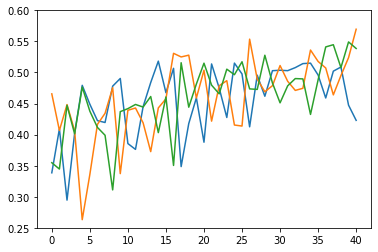

In [132]:
pt = pt.assign(fs_mean = pt.iloc[:,3:6].mean(axis=1))

plt.plot(pt.xs('rms',level=1).sort_values('fs_mean').I.values);
plt.ylim(0.25, 0.6)

(0.25, 0.6)

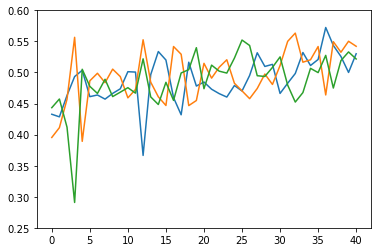

In [131]:
pt = pt.assign(fs_mean = pt.iloc[:,9:12].mean(axis=1))

plt.plot(pt.xs('rms',level=1).sort_values('fs_mean').FS.values);
plt.ylim(0.25, 0.6)

In [123]:
list(pt.xs('rms',level=1).FS.values)

[array([0.47902513, 0.48268017, 0.5231194 ]),
 array([0.49654511, 0.48444864, 0.46070006]),
 array([0.53009926, 0.54217932, 0.52173699]),
 array([0.46628491, 0.51127038, 0.52510172]),
 array([0.47305873, 0.49091579, 0.5118268 ]),
 array([0.49837167, 0.56338914, 0.4523809 ]),
 array([0.45952061, 0.54176307, 0.45508124]),
 array([0.52005677, 0.44687681, 0.48416997]),
 array([0.51304447, 0.48071268, 0.5081805 ]),
 array([0.53215158, 0.51655234, 0.46762421]),
 array([0.46301813, 0.45694808, 0.41196385]),
 array([0.53173548, 0.4742585 , 0.49480646]),
 array([0.50972386, 0.49750173, 0.49359372]),
 array([0.50065242, 0.47268706, 0.46678203]),
 array([0.53370869, 0.46084006, 0.44845571]),
 array([0.57241612, 0.46385026, 0.5275611 ]),
 array([0.48462677, 0.51473693, 0.47390872]),
 array([0.51122817, 0.52047831, 0.50664321]),
 array([0.36650025, 0.55264827, 0.5219423 ]),
 array([0.51654121, 0.44669969, 0.50457457]),
 array([0.47023983, 0.47040077, 0.55221204]),
 array([0.54354352, 0.54957986, 0.

In [128]:
kruskal(*list(pt.xs('rms',level=1).FS.values)), f_oneway(*list(pt.xs('rms',level=1).FS.values)),

(KruskalResult(statistic=44.60424862313113, pvalue=0.2842763320898723),
 F_onewayResult(statistic=0.9927809220954962, pvalue=0.49802836265405026))

In [129]:
kruskal(*list(pt.xs('rms',level=1).I.values)), f_oneway(*list(pt.xs('rms',level=1).I.values)),

(KruskalResult(statistic=54.048255966430474, pvalue=0.06813606596623062),
 F_onewayResult(statistic=1.3991020304027864, pvalue=0.10050452437385282))

In [170]:
def get_characteristic_from_triads(t):
    a = np.sort(t)
    return np.vstack([a[:,0], (a[:,1]+a[:,2])/(2*a[:,0])]).T

In [171]:

dots = pd.DataFrame(data=np.nan, 
    index=pt.index,
    columns=pd.MultiIndex.from_product([sessions,('short_side','triangle_ratio')]),
                    )
                 

In [176]:
 for d, ptp in pt[sessions].groupby(axis=1,level=0):
    dots[d]=get_characteristic_from_triads(ptp.values)
    

In [177]:
dots.head(10)

BL                         I                       BLE  \
         short_side triangle_ratio short_side triangle_ratio short_side   
1004 hf    0.476258       1.071558   0.494446       1.010374   0.480706   
     lf    0.390442       1.268543   0.383315       1.165272   0.454166   
     raw   0.441745       1.132863   0.451301       1.044395   0.462332   
     rms   0.449322       1.129054   0.478503       1.033198   0.489181   
1006 hf    0.460726       1.092296   0.427924       1.059673   0.461306   
     lf    0.431052       1.200659   0.339921       1.346667   0.489177   
     raw   0.454423       1.126536   0.356373       1.257842   0.476484   
     rms   0.417287       1.187802   0.311010       1.532834   0.442795   
1007 hf    0.495939       1.032230   0.465237       1.067931   0.486696   
     lf    0.434958       1.133847   0.254037       1.367482   0.481572   

                                FS                 
         triangle_ratio short_side triangle_ratio  
1004 hf        1.046958   0.474845       1.084255  
     lf        1.053469   0.449257       1.092318  
     raw       1.064267   0.493691       1.013161  
     rms       1.063382   0.479025       1.049840  
1006 hf        1.065236   0.478770       1.031349  
     lf        1.116805   0.409354       1.318629  
     raw       1.097141   0.447710       1.153827  
     rms       1.225923   0.460700       1.064677  
1007 hf        1.022942   0.476296       1.055308  
     lf        1.179833   0.335014       1.106443

(0.95, 1.8)

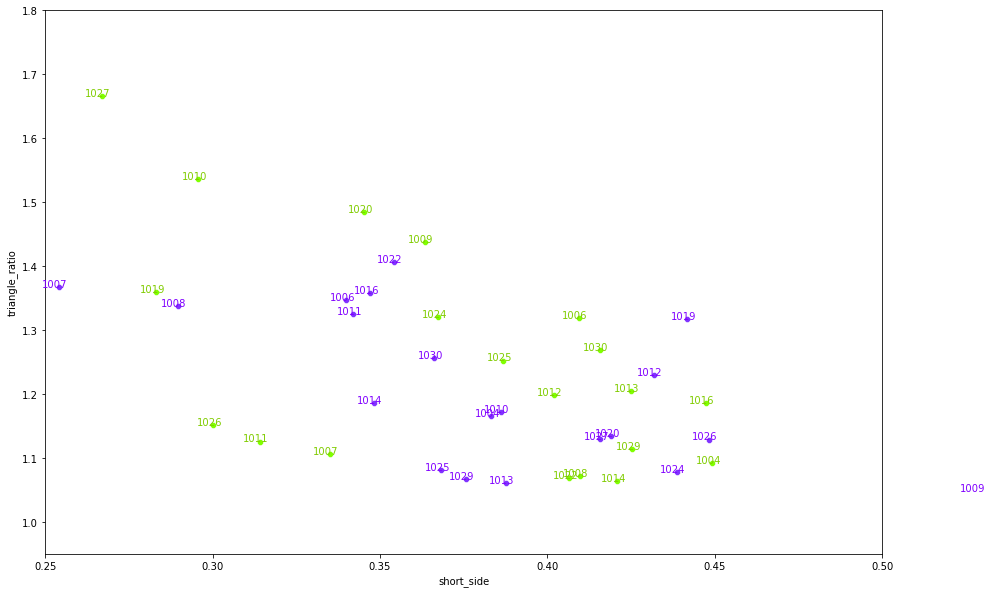

In [235]:
plt.figure(figsize=(15,10))
#plt.subplots(1,2,figsize=(15,10))
#plt.subplot(121)
sns.scatterplot(data=dots['I'].xs('lf',level=1).iloc[:20,:],x='short_side',y='triangle_ratio', 
                color=(0.5,0.2,1),palette='dark', legend=False)

for r in dots['I'].xs('lf',level=1).iloc[:20,:].itertuples():

    plt.text(r.short_side-0.005,r.triangle_ratio,r.Index, color=(0.5,0,1) )
plt.xlim(0.25,0.5)
plt.ylim(0.95, 1.8)


#plt.subplot(122)
sns.scatterplot(data=dots['FS'].xs('lf',level=1).iloc[:20,:],x='short_side',y='triangle_ratio',
               color=(0.5,1,0), palette='dark', legend=False)

for r in dots['FS'].xs('lf',level=1).iloc[:20,:].itertuples():

    plt.text(r.short_side-0.005,
        r.triangle_ratio,
   r.Index,
            color=(0.5,0.8,0),)

plt.xlim(0.25,0.5)
plt.ylim(0.95, 1.8)


In [199]:
dots.index.unique(level=0)

Index(['1004', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013',
       '1014', '1016', '1019', '1020', '1022', '1024', '1025', '1026', '1027',
       '1029', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037',
       '1038', '1039', '1040', '1041', '1042', '1043', '1044', '1045', '1046',
       '1047', '1048', '1049', '1050', '1051'],
      dtype='object')

In [236]:
dots[['I','FS']].xs('lf',level=1)

I                        FS               
     short_side triangle_ratio short_side triangle_ratio
1004   0.383315       1.165272   0.449257       1.092318
1006   0.339921       1.346667   0.409354       1.318629
1007   0.254037       1.367482   0.335014       1.106443
1008   0.289584       1.337356   0.409758       1.071813
1009   0.528153       1.048656   0.363349       1.437971
1010   0.386072       1.171357   0.295806       1.536735
1011   0.342015       1.325272   0.314214       1.125620
1012   0.431873       1.229180   0.401919       1.198928
1013   0.387677       1.060179   0.424869       1.203990
1014   0.348231       1.185224   0.420863       1.064433
1016   0.347134       1.357453   0.447345       1.186343
1019   0.441835       1.317509   0.283231       1.359963
1020   0.419115       1.134743   0.345339       1.484593
1022   0.354201       1.406969   0.406546       1.067899
1024   0.438724       1.077888   0.367494       1.319951
1025   0.368322       1.080852   0.386804       1.252270
1026   0.448275       1.128836   0.300223       1.151596
1027   0.415781       1.129854   0.266885       1.665658
1029   0.375726       1.067444   0.425407       1.114575
1030   0.366216       1.256827   0.415642       1.268249
1031   0.382011       1.283409   0.332972       1.195610
1032   0.232316       1.738305   0.356298       1.131313
1033   0.371796       1.050977   0.344634       1.324282
1034   0.469592       1.162605   0.417357       1.368815
1035   0.307632       1.850413   0.327678       1.190484
1036   0.356612       1.246107   0.296193       1.341838
1037   0.490018       1.022478   0.307812       1.747886
1038   0.386484       1.098772   0.369567       1.054317
1039   0.459755       1.229157   0.397994       1.216718
1040   0.381044       1.541140   0.382456       1.318262
1041   0.421612       1.383507   0.334874       1.265266
1042   0.427126       1.369447   0.467788       1.114292
1043   0.330769       1.665817   0.440275       1.247686
1044   0.404403       1.056281   0.396027       1.067664
1045   0.412771       1.008988   0.433853       1.278757
1046   0.429840       1.194091   0.436508       1.007661
1047   0.407773       1.093971   0.410388       1.291078
1048   0.388762       1.134831   0.427288       1.121639
1049   0.333150       1.422001   0.295270       1.716768
1050   0.416763       1.142398   0.309196       1.239155
1051   0.414440       1.072691   0.371835       1.408951

In [238]:
mat =dots[['I','FS']].xs('lf',level=1).values
diffmat = mat[:,:2]-mat[:,2:]

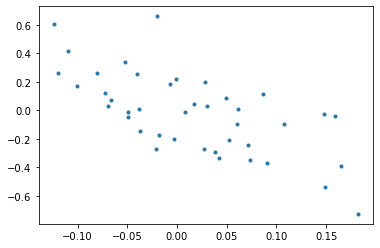

In [239]:
plt.plot(diffmat[:,0], diffmat[:,1],'.')

In [241]:
diffmat.mean(axis=0), diffmat.std(axis=0)

(array([ 0.01378765, -0.01741494]), array([0.08031086, 0.2822301 ]))

In [242]:
adiff = np.abs(diffmat)
adiff.mean(axis=0), adiff.std(axis=0)

(array([0.06651901, 0.21810224]), array([0.04706542, 0.17996811]))

In [245]:
print(mat.mean(axis=0))
print(mat.std(axis=0))

[0.38758229 1.2429855  0.37379464 1.26040044]
[0.05793914 0.19284994 0.05349297 0.17624298]


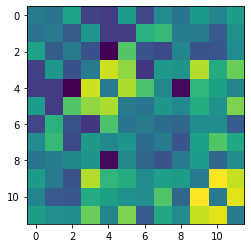

In [255]:
corrmat = pt.iloc[:,:-1].corr().values-np.diag(np.ones(12))
plt.imshow(corrmat)

In [259]:
corrmat[4,2]

-0.2367287912918667

In [261]:
pt.columns[[10,11]]

MultiIndex([('FS', 'dist2'),
            ('FS', 'dist3')],
           )

In [269]:
corrmats = {}

for d, gg in pt.iloc[:,:-1].groupby(level=1):
    corrmats[d]=gg.corr()


In [274]:
corrmats['lf'].applymap(lambda x: round(x,2) if x>0.2 and x<1 else 0.)

BL                 I               BLE                FS        \
          dist1 dist2 dist3 dist1 dist2 dist3 dist1 dist2 dist3 dist1 dist2   
BL  dist1  0.00   0.0  0.22  0.00  0.00  0.00   0.0   0.0   0.0  0.00  0.00   
    dist2  0.00   0.0  0.00  0.00  0.00  0.00   0.0   0.0   0.0  0.00  0.00   
    dist3  0.22   0.0  0.00  0.00  0.00  0.30   0.0   0.0   0.0  0.00  0.00   
I   dist1  0.00   0.0  0.00  0.00  0.35  0.00   0.0   0.0   0.0  0.23  0.00   
    dist2  0.00   0.0  0.00  0.35  0.00  0.31   0.0   0.0   0.0  0.00  0.00   
    dist3  0.00   0.0  0.30  0.00  0.31  0.00   0.0   0.0   0.0  0.00  0.00   
BLE dist1  0.00   0.0  0.00  0.00  0.00  0.00   0.0   0.0   0.0  0.00  0.00   
    dist2  0.00   0.0  0.00  0.00  0.00  0.00   0.0   0.0   0.0  0.00  0.00   
    dist3  0.00   0.0  0.00  0.00  0.00  0.00   0.0   0.0   0.0  0.00  0.00   
FS  dist1  0.00   0.0  0.00  0.23  0.00  0.00   0.0   0.0   0.0  0.00  0.27   
    dist2  0.00   0.0  0.00  0.00  0.00  0.00   0.0   0.0   0.0  0.27  0.00   
    dist3  0.22   0.0  0.00  0.00  0.00  0.23   0.0   0.0   0.0  0.00  0.26   

                 
          dist3  
BL  dist1  0.22  
    dist2  0.00  
    dist3  0.00  
I   dist1  0.00  
    dist2  0.00  
    dist3  0.23  
BLE dist1  0.00  
    dist2  0.00  
    dist3  0.00  
FS  dist1  0.00  
    dist2  0.26  
    dist3  0.00

In [275]:
corrmats['hf'].applymap(lambda x: round(x,2) if x>0.2 and x<1 else 0.)

BL                 I               BLE                FS        \
          dist1 dist2 dist3 dist1 dist2 dist3 dist1 dist2 dist3 dist1 dist2   
BL  dist1  0.00  0.00  0.34  0.00   0.0  0.00  0.00  0.00  0.00  0.00  0.00   
    dist2  0.00  0.00  0.00  0.00   0.0  0.25  0.21  0.26  0.00  0.00  0.00   
    dist3  0.34  0.00  0.00  0.00   0.2  0.00  0.00  0.00  0.00  0.00  0.00   
I   dist1  0.00  0.00  0.00  0.00   0.0  0.36  0.00  0.00  0.00  0.00  0.25   
    dist2  0.00  0.00  0.20  0.00   0.0  0.00  0.00  0.00  0.00  0.00  0.00   
    dist3  0.00  0.25  0.00  0.36   0.0  0.00  0.00  0.00  0.00  0.00  0.00   
BLE dist1  0.00  0.21  0.00  0.00   0.0  0.00  0.00  0.24  0.00  0.40  0.00   
    dist2  0.00  0.26  0.00  0.00   0.0  0.00  0.24  0.00  0.00  0.00  0.00   
    dist3  0.00  0.00  0.00  0.00   0.0  0.00  0.00  0.00  0.00  0.23  0.00   
FS  dist1  0.00  0.00  0.00  0.00   0.0  0.00  0.40  0.00  0.23  0.00  0.00   
    dist2  0.00  0.00  0.00  0.25   0.0  0.00  0.00  0.00  0.00  0.00  0.00   
    dist3  0.00  0.00  0.00  0.00   0.0  0.26  0.00  0.00  0.00  0.00  0.00   

                 
          dist3  
BL  dist1  0.00  
    dist2  0.00  
    dist3  0.00  
I   dist1  0.00  
    dist2  0.00  
    dist3  0.26  
BLE dist1  0.00  
    dist2  0.00  
    dist3  0.00  
FS  dist1  0.00  
    dist2  0.00  
    dist3  0.00

In [276]:
corrmats['rms'].applymap(lambda x: round(x,2) if x>0.2 and x<1 else 0.)

BL                 I               BLE                FS        \
          dist1 dist2 dist3 dist1 dist2 dist3 dist1 dist2 dist3 dist1 dist2   
BL  dist1  0.00  0.00  0.00  0.00  0.00  0.22  0.00  0.29  0.00  0.00  0.00   
    dist2  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.27  0.25  0.00   
    dist3  0.00  0.00  0.00  0.00  0.00  0.00  0.23  0.00  0.00  0.00  0.00   
I   dist1  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.44  0.00  0.00   
    dist2  0.00  0.00  0.00  0.00  0.00  0.22  0.00  0.00  0.00  0.00  0.00   
    dist3  0.22  0.00  0.00  0.00  0.22  0.00  0.00  0.00  0.00  0.00  0.00   
BLE dist1  0.00  0.00  0.23  0.00  0.00  0.00  0.00  0.00  0.00  0.24  0.37   
    dist2  0.29  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
    dist3  0.00  0.27  0.00  0.44  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
FS  dist1  0.00  0.25  0.00  0.00  0.00  0.00  0.24  0.00  0.00  0.00  0.00   
    dist2  0.00  0.00  0.00  0.00  0.00  0.00  0.37  0.00  0.00  0.00  0.00   
    dist3  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

                 
          dist3  
BL  dist1   0.0  
    dist2   0.0  
    dist3   0.0  
I   dist1   0.0  
    dist2   0.0  
    dist3   0.0  
BLE dist1   0.0  
    dist2   0.0  
    dist3   0.0  
FS  dist1   0.0  
    dist2   0.0  
    dist3   0.0

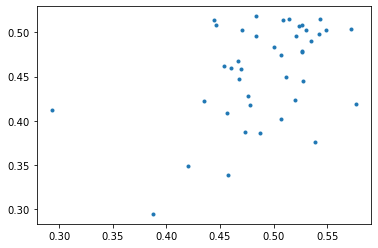

In [277]:
plt.plot(pt[('BLE','dist3')].xs('rms',level=1),pt[('I','dist1')].xs('rms',level=1),'.')

In [279]:
np.corrcoef(pt[('BLE','dist3')].xs('rms',level=1), pt[('I','dist1')].xs('rms',level=1))

array([[1.        , 0.43806856],
       [0.43806856, 1.        ]])